In [ ]:
!pip install -qU llama-index-vector-stores-lancedb
!pip install -qU llama-index-multi-modal-llms-gemini
!pip install -qU llama-index-embeddings-clip
!pip install -qU git+https://github.com/openai/CLIP.git
!pip install -qU llama-index-readers-file
!pip install -qU llama_index



ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.

Pydub is a Python library for audio manipulation, enabling easy loading, editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.

SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.


In [2]:
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [3]:
from pathlib import Path
import speech_recognition as sr
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import os
from google.colab import userdata
my_key=userdata.get('my_key')
os.environ['GOOGLE_API_KEY']=my_key

In [5]:
os.getcwd()

'/content'

In [6]:
output_video_path="/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [7]:
!mkdir mixed_data

In [8]:
filepath=output_video_path + "input_vid.mp4"
filepath


'/content/video_data/input_vid.mp4'

In [9]:
from pytube import YouTube, request
request.default_range_size = 1048576  # 1MB chunks

YouTube._cipher_cache = {}


In [10]:
!pip install -U yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.4 MB/s eta 0:00:00


In [11]:
from yt_dlp import YoutubeDL

def download(url, output_path):
    ydl_opts = {
        'format': 'bestvideo+bestaudio/best',
        'outtmpl': f'{output_path}/input_vid.%(ext)s',  # Proper output path & filename
        'merge_output_format': 'mp4',
        'quiet': False,
        'verbose': True,
    }

    with YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(url)
        metadata = {
            "Author": info_dict.get("uploader"),
            "Title": info_dict.get("title"),
            "Views": info_dict.get("view_count")
        }
        return metadata

In [12]:
vid_url = "https://youtu.be/pEjO5IBKLY4?si=Zb-xUiGanwTkJy54"
output_video_path = "/content/video_data"

metadata_vid = download(vid_url, output_video_path)

[debug] Encodings: locale utf-8, fs utf-8, pref utf-8, out UTF-8 (No ANSI), error UTF-8 (No ANSI), screen UTF-8 (No ANSI)
[debug] yt-dlp version stable@2025.06.25 from yt-dlp/yt-dlp [1838a1ce5] (pip) API
[debug] params: {'format': 'bestvideo+bestaudio/best', 'outtmpl': '/content/video_data/input_vid.%(ext)s', 'merge_output_format': 'mp4', 'quiet': False, 'verbose': True, 'compat_opts': set(), 'http_headers': {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.70 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', 'Accept-Language': 'en-us,en;q=0.5', 'Sec-Fetch-Mode': 'navigate'}}
[debug] Python 3.11.13 (CPython x86_64 64bit) - Linux-6.1.123+-x86_64-with-glibc2.35 (OpenSSL 3.0.2 15 Mar 2022, glibc 2.35)
[debug] exe versions: ffmpeg 4.4.2 (setts), ffprobe 4.4.2
[debug] Optional libraries: Cryptodome-3.23.0, certifi-2025.06.15, curl_cffi-0.11.4, requests-2.32.3, secretstorage-3.3.3, sqli

[youtube] Extracting URL: https://youtu.be/pEjO5IBKLY4?si=Zb-xUiGanwTkJy54
[youtube] pEjO5IBKLY4: Downloading webpage
[youtube] pEjO5IBKLY4: Downloading tv client config
[youtube] pEjO5IBKLY4: Downloading player 8e20cb06-main


[debug] Saving youtube-sts.8e20cb06-main to cache


[youtube] pEjO5IBKLY4: Downloading tv player API JSON
[youtube] pEjO5IBKLY4: Downloading ios player API JSON


[debug] [youtube] Decrypted nsig clpZGIMJFcrtiYRs => LxCGeE8FnqqBZQ
[debug] Saving youtube-nsig.8e20cb06-main to cache
[debug] [youtube] Decrypted nsig GrxIun3xjIOPfFv3 => RbeeykHNxZ1hBw
[debug] [youtube] pEjO5IBKLY4: ios client https formats require a GVS PO Token which was not provided. They will be skipped as they may yield HTTP Error 403. You can manually pass a GVS PO Token for this client with --extractor-args "youtube:po_token=ios.gvs+XXX". For more information, refer to  https://github.com/yt-dlp/yt-dlp/wiki/PO-Token-Guide . To enable these broken formats anyway, pass --extractor-args "youtube:formats=missing_pot"


[youtube] pEjO5IBKLY4: Downloading m3u8 information


[debug] Sort order given by extractor: quality, res, fps, hdr:12, source, vcodec, channels, acodec, lang, proto
[debug] Formats sorted by: hasvid, ie_pref, quality, res, fps, hdr:12(7), source, vcodec, channels, acodec, lang, proto, size, br, asr, vext, aext, hasaud, id


[info] pEjO5IBKLY4: Downloading 1 format(s): 248+251


[debug] Invoking http downloader on "https://rr2---sn-q4fl6nsr.googlevideo.com/videoplayback?expire=1750984969&ei=qZRdaJCvBP--sfIP-Kns-AU&ip=34.16.153.127&id=o-ACgyU7X4-td_TnsWuFg_jpn303I5SeN_8vllIa5s_etn&itag=248&aitags=133%2C134%2C135%2C136%2C137%2C160%2C242%2C243%2C244%2C247%2C248%2C278&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1750963369%2C&mh=ol&mm=31%2C26&mn=sn-q4fl6nsr%2Csn-a5mekn6s&ms=au%2Conr&mv=m&mvi=2&pl=17&rms=au%2Cau&ctier=L&bui=AY1jyLNUdeJM-Hujuo-5sHneXJ3n8n6HzXX0bJF4ZXI3jpF2YeOa8Eed4ySwKIHt4q1tFUCGNCWNyYEX&spc=l3OVKVNYzGPOFSyn7E_Del1s-Iq3hQV3xQqOkgnEMRGlKQzWRdnyYQmhQIBn-ow&vprv=1&svpuc=1&mime=video%2Fwebm&ns=fNQ4nf0lcjJTQl0p0aTu_LsQ&rqh=1&gir=yes&clen=41707261&dur=287.040&lmt=1713614737551042&mt=1750963028&fvip=3&keepalive=yes&lmw=1&c=TVHTML5&sefc=1&txp=530F224&n=RbeeykHNxZ1hBw&sparams=expire%2Cei%2Cip%2Cid%2Caitags%2Csource%2Crequiressl%2Cxpc%2Cctier%2Cbui%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cns%2Crqh%2Cgir%2Cclen%2Cdur%2Clmt&sig=AJfQdSswRQIhAKHI2mO83JNGdMK3godPQA

[download] Destination: /content/video_data/input_vid.f248.webm
[download] 100% of   39.78MiB in 00:00:02 at 18.03MiB/s  


[debug] Invoking http downloader on "https://rr2---sn-q4fl6nsr.googlevideo.com/videoplayback?expire=1750984969&ei=qZRdaJCvBP--sfIP-Kns-AU&ip=34.16.153.127&id=o-ACgyU7X4-td_TnsWuFg_jpn303I5SeN_8vllIa5s_etn&itag=251&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1750963369%2C&mh=ol&mm=31%2C26&mn=sn-q4fl6nsr%2Csn-a5mekn6s&ms=au%2Conr&mv=m&mvi=2&pl=17&rms=au%2Cau&ctier=L&bui=AY1jyLNUdeJM-Hujuo-5sHneXJ3n8n6HzXX0bJF4ZXI3jpF2YeOa8Eed4ySwKIHt4q1tFUCGNCWNyYEX&spc=l3OVKVNYzGPOFSyn7E_Del1s-Iq3hQV3xQqOkgnEMRGlKQzWRdnyYQmhQIBn-ow&vprv=1&svpuc=1&mime=audio%2Fwebm&ns=fNQ4nf0lcjJTQl0p0aTu_LsQ&rqh=1&gir=yes&clen=4496168&dur=287.061&lmt=1713614778486711&mt=1750963028&fvip=3&keepalive=yes&lmw=1&c=TVHTML5&sefc=1&txp=5308224&n=RbeeykHNxZ1hBw&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cxpc%2Cctier%2Cbui%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cns%2Crqh%2Cgir%2Cclen%2Cdur%2Clmt&sig=AJfQdSswRQIhAKrRKPecIBicksAuEQ40qLQElHLS3hHrUIBbLU9EE8_-AiBpUom_UniR_hLAy6ywl5qvq3VewCxVzxZS1x5uDKZW1Q%3D%3D&lspar

[download] Destination: /content/video_data/input_vid.f251.webm
[download] 100% of    4.29MiB in 00:00:00 at 15.31MiB/s  
[Merger] Merging formats into "/content/video_data/input_vid.mp4"


[debug] ffmpeg command line: ffmpeg -y -loglevel repeat+info -i file:/content/video_data/input_vid.f248.webm -i file:/content/video_data/input_vid.f251.webm -c copy -map 0:v:0 -map 1:a:0 -movflags +faststart file:/content/video_data/input_vid.temp.mp4


Deleting original file /content/video_data/input_vid.f248.webm (pass -k to keep)
Deleting original file /content/video_data/input_vid.f251.webm (pass -k to keep)


In [13]:
print(metadata_vid)

{'Author': 'shiksha.com', 'Title': 'IIT Bhilai Review : Cut Off, Ranking, Courses, Admission 2024, Fees, Placements', 'Views': 19875}


In [14]:
# vid_url = "https://youtu.be/X7DsJ0Hiq0I?si=wDU3T42gXNlxxPot"
# output_video_path="/content/video_data/"

# from pytube import YouTube
# def download_video(url,output_path):
#   yt = YouTube(url)
#   metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

#   yt.streams.get_highest_resolution().download(
#         output_path=output_path, filename="input_vid.mp4"
#     )
#   return metadata



In [15]:
from moviepy.editor import VideoFileClip

def vid_to_img(vid_path,output_folder):
  clip=VideoFileClip(vid_path)
  clip.write_images_sequence(
      os.path.join(output_folder, "frame_%04d.png"), fps=0.2
  )

  if event.key is 'enter':



In [16]:
vid_to_img(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame_%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame_%04d.png.


In [17]:
def vid_to_aud(vid_path,output_audio_path):
  clip=VideoFileClip(vid_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [18]:
vid_to_aud(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [19]:
%pip install -qU openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [20]:
def aud_to_text(audio_path):
  r=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=r.record(source)

    try:
      text=r.recognize_whisper(audio_data)
    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [21]:
text_data=aud_to_text(output_audio_path)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 97.3MiB/s]


In [22]:
text_data

" Established in 2016 in Chattisgarh, IIT Bhillai recently made its debut in the NIRF rankings at the 81st position. This third generation IIT has received a commendable 4.1 star rating from students on Shiksha.com. While such ratings typically indicates strong performance in placements, campus environment and teaching quality, there are concerns voiced by students regarding the adequacy of infrastructure facilities. So what's the ground reality? Let's find out starting with placements that have been rated 4 out of 5 on Shiksha.com. More than 130 offers were made to the BTEC graduating batch, last year resulting in a placement percentage of 86%. If we see that year on your trend, average packages have improved from 12 lakh per annum in 2021 to 14 lakh in 2023. But these figures are not insignificantly less than those offered at other third generation IITs like Tirupati and Jammu. Did you know that for the first time this year international offers from Accenture Japan were backed by stu

In [50]:
with open(output_folder+"output_text.txt", "w") as file:
  file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [28]:
%pip install -qU llama-index-embeddings-gemini

In [51]:
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.core import Settings
Settings.embed_model=GeminiEmbedding(model_name="models/embedding-001",api_key=my_key)

  Settings.embed_model=GeminiEmbedding(model_name="models/embedding-001",api_key=my_key)



In [52]:
from llama_index.core import SimpleDirectoryReader, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [25]:
!pip install -qU llama-index-embeddings-clip
!pip install -qU git+https://github.com/openai/CLIP.git

  Preparing metadata (setup.py) ... done


In [53]:
text_store = LanceDBVectorStore(uri="./lancedb", table_name="text_collection")
img_store=LanceDBVectorStore(uri="./lancedb",table_name="image_collection")

In [54]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=img_store)

In [47]:
output_folder

'/content/mixed_data/'

In [55]:
document=SimpleDirectoryReader(output_folder).load_data()

In [56]:
index=MultiModalVectorStoreIndex.from_documents(document,storage_context=storage_context)

In [75]:
retriever_engine=index.as_retriever(similarity_top_k=2,image_similarity_top_k=4)

In [76]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [91]:
def retrieve(retriever_engine,query_text):
  retrieval_results = retriever_engine.retrieve(query_text)

  retrieved_image = []
  retrieved_text = []

  for res_node in retrieval_results:
      if isinstance(res_node.node, ImageNode):
          retrieved_image.append(res_node.node.metadata["file_path"])
      else:
          display_source_node(res_node, source_length=200)
          retrieved_text.append(res_node.text)
  return retrieved_image, retrieved_text


In [139]:
query="tell me the courses available in iit bhilai"

In [140]:
img,text=retrieve(retriever_engine,query)

**Node ID:** 0cb6f34d-2249-4729-ac86-c4242b669e4b<br>**Similarity:** 0.5726527571678162<br>**Text:** Students are given the flexibility to choose their electives. Mixed opinions are received over the level of difficulty of semester exams. Some find them tough while others feel that if you pay atte...<br>

**Node ID:** 74284a30-cb6c-4e2d-8522-3806e11c5582<br>**Similarity:** 0.5183182954788208<br>**Text:** Established in 2016 in Chattisgarh, IIT Bhillai recently made its debut in the NIRF rankings at the 81st position. This third generation IIT has received a commendable 4.1 star rating from students...<br>

In [141]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

In [142]:
img

['/content/mixed_data/frame_0025.png',
 '/content/mixed_data/frame_0010.png',
 '/content/mixed_data/frame_0011.png',
 '/content/mixed_data/frame_0027.png']

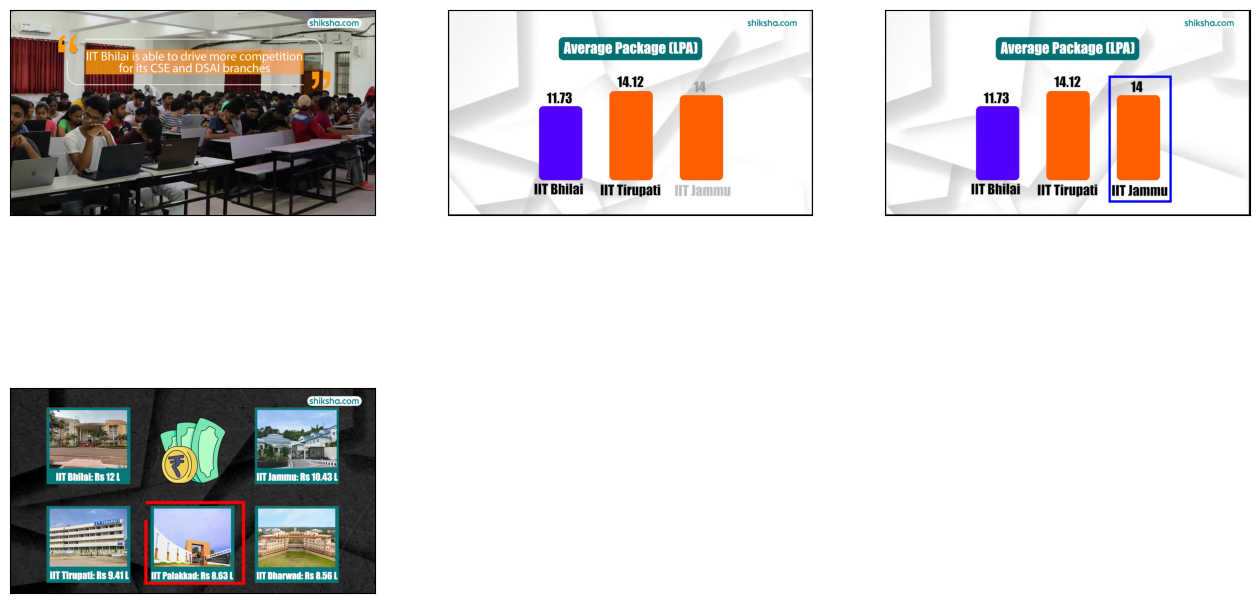

In [143]:
plot_images(img)

In [144]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)


In [145]:
import json
metadata_str=json.dumps(metadata_vid)

In [146]:
query_text=query

In [147]:
context_str = "".join(text)

In [148]:
image_documents = SimpleDirectoryReader(input_files=img).load_data()

In [149]:
!pip install -qU llama-index-llms-gemini

In [150]:
from llama_index.llms.gemini import Gemini

model = Gemini(model_name="models/gemini-2.5-flash",api_key=my_key)

  model = Gemini(model_name="models/gemini-2.5-flash",api_key=my_key)



In [151]:
from llama_index.core.prompts import PromptTemplate
prompt_template = PromptTemplate(
    template=qa_tmpl_str,
    input_variables="context_str, metadata_str, query_str"
)

# msg = ChatMessage(final_prompt)
# msg.blocks.append(ImageBlock(image_documents))

In [152]:
result = model.predict(
    prompt=prompt_template,
    image_documents=image_documents,
    context_str=context_str,
    metadata_str=metadata_str,
    query_str=query_text
)

In [153]:
result

'IIT Bhilai offers six specializations in B.Tech. The explicitly mentioned branches/specializations are Computer Science Engineering (CSE), Data Science and AI (DSAI), and Electrical.'